# Foot Locker Candidate Questions - Python

**Candidate Name:** *Pradyumna*

**Date Completed:** *11/01/2019*

Congratulations on making it to this stage of the interview process!  For the next step of your candidacy, you will be asked to solve five unique problems; each one focuses on a distinct data science skill such as data access, data transformation, hypothesis testing, model evaluation, and lastly, you will be asked to interpret a report and make a recommendation.  You are free to use whatever languages and tools you choose for this assignment, but all code and derived data must be included in your final submission. Document formats such as `.ipynb`, `.rmd`, `.html`, and `.docx` are acceptable for submission. 

We are going to try and run your code, so if it references obscure libraries, please indicate this as well as how to locate/install them.  You need to be sure you do what the core task indicates; but, you should feel free to use novel and ingenious approaches. We do not want you to spend money for any API usage or external service; the project is expected to be completed within the free tier of any service. Based on the feedback from other candidates we also expect that the challenge should *not take more than two hours* to complete.

An evaluation rubric is not provided, but some of the things we will look at are:

1. **Completeness** and **correctness** of the project and codebase.
2. **Robustness** and **clarity** of the documentation included with the submission 
3. **Language selection** and **library dependency** appropriateness.
4. **Sophistication** and **ingenuity** in thinking and approach.

Each question also contains a bonus question at the end; this part is entirely optional, and a few sentence summary is sufficient.  

*Hint:* Clarity means articulating the approach and results cleanly and concisely.  *Overly verbose code and responses can be detrimental to your score*.

When you have completed the challenge, email your results to the email address you received this packet from.

>**Notice of Confidentiality:** This document, scenario, and data are proprietary to Foot Locker, Inc. And cannot be copied or distributed without the expressed written permission by Foot Locker, Inc. Failure to adhere to this notice of confidentiality will result in the immediate termination of the candidate's application and could result in legal action.

## Question One: Data Access

An often encountered step to data pre-processing usually involves querying data that exists within a relational database system. Typically such data may be transactional in nature, and as a result, it is optimized for a relational data model. While this format is critical for performance, efficient storage, and quick updates, it is often not suitable for data science work. In this next question, you will be asked to access data from a fictitious relational database and perform query operations to get it into a suitable format for analysis. The required output for this question is the correct SQL code and query results, you may use any dialect of SQL you wish, but submissions in any other language will be considered incorrect.

You have been granted access to a database that contains two tables; `Order_Detail` and `Product_Detail` that are stored in a relational format.  `Order_Detail` contains transactional information and possesses the following schema:

#### Table Order_Detail Schema

> **invoice_id:** The unique id for each transaction.
>
> **invoice_line:** A unique id for each item sold with each transaction (ie, multiple items can be purchased with each invoice.)
>
> **store_id:** The store where transaction took place.
>
> **time_stamp:** The date of the purchase.
>
> **product:** The unique id for the product sold within the transaction (every product sold has a unique product id.)
>
> **units:** The number of the products sold with the transaction (ie, you could purchase 2 of the same item.)
>
> **sales:** The gross sales for the item sold.
>
> **cogs:** The cost of the item sold (i.e. not the cost to the customer, but the cost to the business for the product.)

| invoice_id | invoice_line | store_id | time_stamp | product | units | sales  | cogs  | 
|------------|--------------|----------|------------|---------|-------|--------|-------| 
| 10000001   | 31215        | 3        | 9/3/17     | 3000    | 1     | 99.99  | 58.00 | 
| 10000001   | 31216        | 3        | 9/3/17     | 3354H   | 3     | 32.99  | 18.00 | 
| 10000002   | 91455        | 1        | 9/5/17     | 1234    | 2     | 24.99  | 20.00 | 
| 10000003   | 59943        | 2        | 9/5/17     | 3000    | 1     | 19.99  | 14.99 | 
| 10000004   | 95027        | 2        | 9/5/17     | 18518   | 1     | 9.99   | 3.00  | 
| 10000005   | 73994        | 2        | 9/5/17     | 12HA12  | 15    | 3.99   | 1.99  | 
| 10000006   | 98464        | 1        | 10/1/17    | wh30000 | 1     | 199.99 | 75.00 | 


#### Table Product_Detail Schema
> **product:** The unique id for the product sold within the transaction (every product sold has a unique product id.)
>
> **cat_name:** The listed name for a given product category.
>
> **key_internal:** No documentation exists for this field. 

| product | cat_name | key_internal|
|---------|--------- |  ---------  |
| 3000    | WidgetA  |  17375273   |
| 3354H   | WidgetB  |  15477787   |
| 1234    | WidgetC  |  97845235   |
| 18518   | WidgetD  |  47813334   |
| 12HA12  | WidgetD  |  48573988   |
| wh30000 | WidgetE  |  00000000   |

Your task is to construct a single SQL query that returns the following results:

> Summarized total sales, total quantity sold, and total profit (which can be calculated as total sales less cogs) by the week number, store id, product category name.  It is important to note that in this business, the week begins on a *Tuesday*.  

*Hint:*  The week number is the week portion of a date value, from 0 to 53. 

*Bonus Question:* How would you use Python to access this data and perform these operations?

The following SQL code has been provided if you choose to create these tables in a test database.

```sql
--clean up existing tables
DROP TABLE IF EXISTS Order_Detail;
DROP TABLE IF EXISTS Product_Detail;

--create order table and populate records
CREATE TABLE IF NOT EXISTS Order_Detail (
    invoice_id INTEGER NOT NULL,
    invoice_line INTEGER NOT NULL,
    store_id INTEGER NOT NULL,
    time_stamp DATE NOT NULL,
    product VARCHAR(8) NOT NULL,
    units INTEGER NOT NULL,
    sales NUMERIC(7 , 2 ) NOT NULL,
    cogs NUMERIC(5 , 2 ) NOT NULL
);

INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000001,31215,3,'2017/09/03','3000',1,99.99,58.00);
INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000001,31216,3,'2017/09/03','3354H',3,32.99,18.00);
INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000002,91455,1,'2017/09/05','1234',2,24.99,20.00);
INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000003,59943,2,'2017/09/05','3000',1,19.99,14.99);
INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000004,95027,2,'2017/09/05','18518',1,9.99,3.00);
INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000005,73994,2,'2017/09/10','12HA12',15,3.99,1.99);
INSERT INTO Order_Detail(invoice_id,invoice_line,store_id,time_stamp,product,units,sales,cogs) VALUES (10000006,98464,1,'2017/10/01','wh30000',1,199.99,75.00);

--create product table and populate records
CREATE TABLE IF NOT EXISTS Product_Detail (
    product VARCHAR(8) NOT NULL,
    cat_name VARCHAR(8) NOT NULL,
    key_interal VARCHAR(8) NOT NULL
);

INSERT INTO Product_Detail(product,cat_name,key_interal) VALUES ('3000','WidgetA','17375273');
INSERT INTO Product_Detail(product,cat_name,key_interal) VALUES ('3354H','WidgetB','15477787');
INSERT INTO Product_Detail(product,cat_name,key_interal) VALUES ('1234','WidgetC','97845235');
INSERT INTO Product_Detail(product,cat_name,key_interal) VALUES ('18518','WidgetD','47813334');
INSERT INTO Product_Detail(product,cat_name,key_interal) VALUES ('12HA12','WidgetD','48573988');
INSERT INTO Product_Detail(product,cat_name,key_interal) VALUES ('wh30000','WidgetE','00000000');
```

In [1]:
#Answer to question one goes here

# This is SQL code executable in mySQL
CREATE DATABASE prad;
USE prad;

SET @day_offset = 2; 
SELECT  SUM(sales) Total_sales , SUM(units) Quantity, SUM(sales-cogs) profit,  week(time_stamp) week_number, store_id, cat_name product_category
FROM order_detail OD
JOIN product_detail PD 
ON OD.product = PD.product
GROUP BY week_number, store_id, product_category
ORDER BY week_number



## Question Two: Data Transformation

Another common task is to take data that may not be in a usable format and 'wrangle' it into a better representation.  This next question will test your ability to clean and order data.

You have been presented with two dataframes: 

#### Dataframe A: Product Attributes
This dataframe contains two columns; the first one is a unique product ID represented by an integer, the second is a string containing a collection of attributes assigned to that product.  

| product | tags                 |
|---------|----------------------|
| 100     | chocolate, sprinkles |
| 101     | chocolate, filled    |
| 102     | glazed               |


#### Dataframe B: Purchase History
The second dataframe contains two columns as well; the first one is a string that contains a customer name, the second is an integer that contains a product number.  The product IDs from column two are the same as the product IDs from column one of dataframe A.

| customer | product |
|----------|---------|
| A        | 100     |
| A        | 101     |
| B        | 101     |
| C        | 100     |
| C        | 102     |
| B        | 101     |
| A        | 100     |
| C        | 102     |

You are asked to create a dataframe matching this format, where the contents of the cells represent the count of occurrences of product attribute by customer.  

| customer | chocolate | sprinkles | filled | glazed |
|----------|-----------|-----------|--------|--------|
| A        | ?         | ?         | ?      | ?      |
| B        | ?         | ?         | ?      | ?      |
| C        | ?         | ?         | ?      | ?      |


After you have completed your code, evaluate it for performance bottlenecks and describe how you would improve the code.  

*Bonus Question:* If the two starting tables were in a relational database or Hadoop cluster and each had a 100 million rows, how might your approach change?

In [2]:
import pandas as pd

tableA = [(100, 'chocolate, sprinkles'),
         (101, 'chocolate, filled'),
         (102, 'glazed')]
labels = ['product', 'tags']
dfA = pd.DataFrame.from_records(tableA, columns=labels)

tableB = [('A', 100),
           ('A', 101),
           ('B', 101),
           ('C', 100),
           ('C', 102),
           ('B', 101),
           ('A', 100),
           ('C', 102)]
labels = ['customer', 'product']
dfB = pd.DataFrame.from_records(tableB, columns=labels)

In [3]:
#Answer to question two goes here

pd3 = pd.merge(dfA,dfB,on='product', how='outer') # merged data frame of A & B
pd3.assign(tags=pd3.tags.str.split(',')).explode('tags').reset_index(drop=True) #merged data frame after splitting the values  
pd.pivot_table(data = pd3,index ='customer', columns = 'tags', values = 'product', aggfunc='count') # output data frame

# Bonus question

I would come up with a similar pyspark code and run it using Hadoop clusters and Spark which uses parallel computation.

## Question Three: Hypothesis Testing
This question will test your statistical and reasoning abilities.  You have been asked to analyze the results of a randomized, controlled experiment on a fictitious website and provide a recommendation.  For this experiment, each visitor to the site is randomly exposed to one of four different product images; visitors are then tracked to see which ones make a purchase or not.  Based on the data provided, which version of the image should be selected to be presented to all visitors and why?

| image | visitors | purchases 
|----------|-----------|----------|
| A        | 21        | 3        | 
| B        | 180       | 30       | 
| C        | 250       | 50       | 
| D        | 100       | 15       | 

*Bonus Question:* How would your analysis change if the visitors and purchase counts numbered in the millions? 

In [8]:
#Answer to question three goes here

The conversion rates for the image versions A,B,C,D could be observed as 14.28%, 16.67%, 20%, 15%. Considering the bernoulli
distribution and applying Central Limit Theorem, the standard deviations of the normal distributions of the Image versions
would be 0.076,0.027,0.025,0.035 respectively. Upon applying the chi-square test we could see that there is no dependency between
the image categories as there is a huge difference between the observed and expected values.

Considering the base conversion rates alone the image version C would be the best choice to consider to present it to all visitors.

# Bonus Question

If the visitors and purchase counts are increased to millions, there would not be much difference in the base conversion rates
, chi-square values and so would be difficult to choose the best image version as there would be high statistical significance
to all the image versions.



## Question Four: Forecasting

For this question, you will be provided with data related to the count of website sessions by day for the past one hundred days.  You are now asked to create a forecast for the next sixty days using this data.  

In [8]:
import pandas as pd
sessionData = {'date': ["1/1/17","1/2/17","1/3/17","1/4/17","1/5/17","1/6/17","1/7/17","1/8/17","1/9/17","1/10/17",
"1/11/17","1/12/17","1/13/17","1/14/17","1/15/17","1/16/17","1/17/17","1/18/17","1/19/17","1/20/17",
"1/21/17","1/22/17","1/23/17","1/24/17","1/25/17","1/26/17","1/27/17","1/28/17","1/29/17","1/30/17",
"1/31/17","2/1/17","2/2/17","2/3/17","2/4/17","2/5/17","2/6/17","2/7/17","2/8/17","2/9/17","2/10/17",
"2/11/17","2/12/17","2/13/17","2/14/17","2/15/17","2/16/17","2/17/17","2/18/17","2/19/17","2/20/17",
"2/21/17","2/22/17","2/23/17","2/24/17","2/25/17","2/26/17","2/27/17","2/28/17","3/1/17","3/2/17","3/3/17",
"3/4/17","3/5/17","3/6/17","3/7/17","3/8/17","3/9/17","3/10/17","3/11/17","3/12/17","3/13/17","3/14/17",
"3/15/17","3/16/17","3/17/17","3/18/17","3/19/17","3/20/17","3/21/17","3/22/17","3/23/17","3/24/17",
"3/25/17","3/26/17","3/27/17","3/28/17","3/29/17","3/30/17","3/31/17","4/1/17","4/2/17","4/3/17",
"4/4/17","4/5/17","4/6/17","4/7/17","4/8/17","4/9/17","4/10/17"],
     'sessions': [88215,88484,87877,86780,84622,84607,84362,84912,84367,85991,86562,86761,85735,85386,84023,
83504,83795,85127,84971,86433,88094,89120,89184,90188,88540,88693,88031,86601,87447,87716,87042,87039,
86197,84339,85095,84764,83386,82621,83256,82997,84614,84480,86006,86436,85711,84115,83612,84812,85036,
84844,83745,85598,84914,85813,86634,86995,88356,87731,89142,90383,90686,93692,93800,93502,93786,92292,
91104,90193,90341,89314,88861,88853,89992,90246,90968,89741,88718,88335,87898,87666,88600,90110,90401,
90370,90346,89691,90643,90489,91289,89290,88668,89804,88989,89976,88239,87444,86951,85434,85655,
85105]}

sessionsDf = pd.DataFrame(data = sessionData)

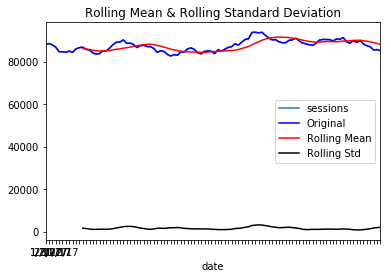

ADF Statistic: -2.447144918335496
p-value: 0.12886964006648377
Critical Values:
	1%: -3.4996365338407074
	5%: -2.8918307730370025
	10%: -2.5829283377617176


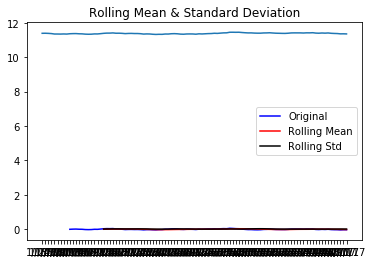

ADF Statistic: -3.67336911626255
p-value: 0.0045037226018158375
Critical Values:
	1%: -3.5078527246648834
	5%: -2.895382030636155
	10%: -2.584823877658872


C:\Users\prady\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\prady\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


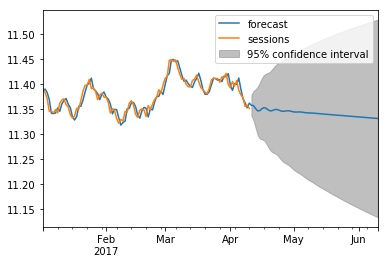

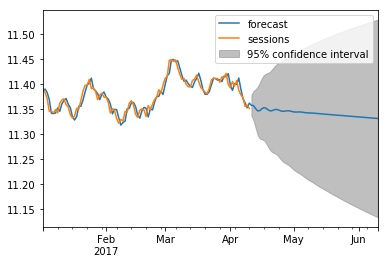

In [9]:
#Answer to question four goes here

sessionsDf.set_index('date', inplace=True)

sessionsDf.plot()
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters

rolling_mean = sessionsDf.rolling(window = 12).mean()
rolling_std = sessionsDf.rolling(window = 12).std()
plt.plot(sessionsDf, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

result = adfuller(sessionsDf['sessions'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))
    
# we observe p value to be 0.12886 which is greater than the critical value 0.05 and so the time series data is not stationary

df_log = np.log(sessionsDf)
plt.plot(df_log)

def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['sessions'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
        
# subtracting rolling mean
rolling_mean = df_log.rolling(window=10).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

# Now the p-value is below the threshold of 0.05 and ADF Statistic is close to the critical values

#decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)

results.plot_predict(1,160) # 100 days of ground truth data and 60 days of prediction. The predicted values could be observed in the plot.


## Question Five: Data Analysis

The internet startup ShinyFancyObjects is looking to make its IPO in the next couple months.  Before doing so, its founders are presenting their company to potential investors and analysts with the goal of generating a higher company valuation before going public.  As a Data Scientist at one of these investment firms, you have been asked to help evaluate ShinyFancyObjects and determine if it would be a good investment.  

You have been provided two resources to help with your analysis; a company fact sheet provided by ShinyFancyObjects, and a table containing data about their customer history.  Using these two pieces of information, determine if this company would be a good long-term investment, and explain why or why not.


**ShinyFancyObjects Fact Sheet; The Hottest Startup Since Facebook**

* ShinyFancyObjects posses a customer file of nearly twenty thousand unique customers.  
* Since its launch in January 2016, ShinyFancyObjects is growing its customer base by 10%.
* There was a new feature release in November of 2016, which was a huge hit with our customers, resulting in a 46% increase in new customers from the prior month.  
* The company predicts it will more than double its customer base in the next year.  
* The January 2017 gain for new customers was a 120% improvement over of January of 2016. 
* Since January of 2016, ShinyFancyObjects has grown its customer base by 1,841%.
* ShinyFancyObjects boasts a customer retention rate of 58%.  

**Customer History**

This table shows new customers acquired by month, along with how many of those same customers remained active in the following months.  As an example, in January 2016, 1,098 new customers were acquired.  One month later, out of the initial 1,098, only 875 were still active, two months later, 800 were active, and so on.  Whereas in February of 2016, 1,358 new customers were acquired, of which 500 were still active six months after. 

| Cohort | Month 0 | Month 1  | Month 2 | Month 3 | Month 4 | Month 5 | Month 6 | Month 7 | Month 8 | Month 9 | Month 10 | Month 11 | Month 12 | Month 13 | 
|--------|---------|----------|---------|---------|---------|---------|---------|---------|---------|---------|----------|----------|----------|----------| 
| Jan-16 | 1098    | 875      | 800     | 765     | 552     | 421     | 403     | 382     | 367     | 341     | 295      | 244      | 201      | 185      | 
| Feb-16 | 1358    | 1019     | 996     | 826     | 713     | 524     | 500     | 495     | 389     | 301     | 257      | 178      | 133      |          | 
| Mar-16 | 1257    | 892      | 741     | 705     | 648     | 498     | 395     | 205     | 168     | 132     | 121      | 84       |          |          | 
| Apr-16 | 1587    | 1174     | 924     | 838     | 699     | 354     | 205     | 158     | 104     | 79      | 55       |          |          |          | 
| May-16 | 1758    | 1213     | 1000    | 751     | 605     | 305     | 165     | 111     | 90      | 65      |          |          |          |          | 
| Jun-16 | 1624    | 1137     | 954     | 754     | 403     | 248     | 205     | 165     | 100     |         |          |          |          |          | 
| Jul-16 | 1541    | 1002     | 874     | 621     | 322     | 201     | 168     | 105     |         |         |          |          |          |          | 
| Aug-16 | 868     | 521      | 499     | 400     | 158     | 118     | 75      |         |         |         |          |          |          |          | 
| Sep-16 | 1143    | 629      | 451     | 384     | 205     | 100     |         |         |         |         |          |          |          |          | 
| Oct-16 | 1253    | 639      | 338     | 255     | 117     |         |         |         |         |         |          |          |          |          | 
| Nov-16 | 1835    | 899      | 241     | 107     |         |         |         |         |         |         |          |          |          |          | 
| Dec-16 | 2155    | 862      | 205     |         |         |         |         |         |         |         |          |          |          |          | 
| Jan-17 | 2422    | 848      |         |         |         |         |         |         |         |         |          |          |          |          | 
| Feb-17 | 2531    |          |         |         |         |         |         |         |         |         |          |          |          |          | 

*Bonus Question:* What other data sources would be helpful in making your recommendation? 

In [ ]:
# Answer

Observing the data we could see that the customer base for the ShinyFancyObjects company is growing by a positive percentage
and the retention rate is also observed to be close to 58% which are the good factors for the investment.

But we could also observe that churn rate increases from 20.309% to 64.987% between Jan-16 to Jan-17 respectively taking the
time period between Month 0 to Month 1. Although there is an increase in customer base due to the new feature release in 
Nov-16, it did not decrease the churn rate and was observed to be around 51%.

As part of the good investment strategy the churn rate of the target company should decrease on progression of time, but in
the case of ShinyFancyObjects company the churn rate increases and so this company would be bad choice for long-term investment
based on the churn rate.

# Bonus question answer

The other data sources which would be helpful for the recommendations would be knowing more about the business area of the 
company, size of the Market Cap, Debt Ratio, Return of Equity, Compounded Profit Growth..etc